# Group Project Thicket Python Code

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("Comparison_Weak/*.cali"))

In [3]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              363703760     1   
                                                  431941312     1   
                                                  683062979     1   
                                                  917732386     1   
                                                  1460014029    1   
                                                  1548786309    1   
                                                  1785488564    1   
                                                  1960355336    1   
                                                  2418408528    1   
                                                  2432730687    1   
                                                  2536657295    1   
                                                  2669804463    1   
                                                  2723905307    1   
                                                  3362705911    1   
                                                  3571994103    1   
                                                  4011706752    1   
{'name': 'comm', 'type': 'function'}              363703760     3   
                                                  431941312     3   
                                                  683062979     3   
                                                  917732386     3   
                                                  1460014029    3   
                                                  1548786309    3   
                                                  1785488564    3   
                                                  1960355336    3   
                                                  2418408528    3   
                                                  2432730687    3   
                                                  2536657295    3   
                                                  2669804463    3   
                                                  2723905307    3   
                                                  3362705911    3   
                                                  3571994103    3   
                                                  4011706752    3   
{'name': 'comm_large', 'type': 'function'}        363703760     4   
                                                  431941312     4   
                                                  683062979     4   
                                                  917732386     4   
                                                  1460014029    4   
                                                  1548786309    4   
                                                  1785488564    4   
                                                  1960355336    4   
                                                  2418408528    4   
                                                  2432730687    4   
                                                  2536657295    4   
                                                  2669804463    4   
                                                  2723905307    4   
                                                  3362705911    4   
                                                  3571994103    4   
                                                  4011706752    4   
{'name': 'MPI_Gather', 'type': 'function'}        363703760     8   
                                                  431941312     8   
                                                  683062979     8   
                                                  917732386     8   
                                                  1460014029    8   
                                                  1548786309    8   
                                                  1785488564    8   
                                                  1960355336    8   
                                                  2418408528

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
363703760,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p256-a1048576-random.cali,true,andrew.hooper14,1700236262,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,256,11,"Online, AI"
431941312,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,bitonic_mpi/bitonic-p128-a1048576-random.cali,true,andrew.hooper14,1700240085,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonicsort, 1048576, 1, random]",c,Bitonic_Sort,MPI,Int,4,1048576,random,128,11,"Online, AI"
683062979,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,bitonic_mpi/bitonic-p64-a1048576-random.cali,true,andrew.hooper14,1700240016,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonicsort, 1048576, 1, random]",c,Bitonic_Sort,MPI,Int,4,1048576,random,64,11,"Online, AI"
917732386,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,bitonic_mpi/bitonic-p16-a1048576-random.cali,true,andrew.hooper14,1700239856,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonicsort, 1048576, 1, random]",c,Bitonic_Sort,MPI,Int,4,1048576,random,16,11,"Online, AI"
1460014029,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p128-a1048576-random.cali,true,andrew.hooper14,1700236220,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,128,11,"Online, AI"
1548786309,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,bitonic_mpi/bitonic-p2-a1048576-random.cali,true,andrew.hooper14,1701544632,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonicsort, 1048576, 1, random]",c,Bitonic_Sort,MPI,Int,4,1048576,random,2,11,"Online, AI"
1785488564,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p4-a1048576-random.cali,true,andrew.hooper14,1701451077,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,4,11,"Online, AI"
1960355336,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p16-a1048576-random.cali,true,andrew.hooper14,1700235869,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,16,11,"Online, AI"
2418408528,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge_mpi/merge-p2-a1048576-random.cali,true,andrew.hooper14,1701451077,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1, random]",c,Merge_Sort,MPI,Int,4,1048576,random,2,11,"Online, AI"


In [5]:
gb = tk.groupby("Algorithm")

2  thickets created...
{'Bitonic_Sort': <thicket.thicket.Thicket object at 0x2b6df0e4e340>, 'Merge_Sort': <thicket.thicket.Thicket object at 0x2b6e15463070>}


Compose these 3 groups column-wise to get a holistic view of the data

In [6]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [7]:
ctk.dataframe

Bitonic_Sort  \
                                                                     nid   
node                                              num_procs                
{'name': 'main', 'type': 'function'}              2                    1   
                                                  4                    1   
                                                  8                    1   
                                                  16                   1   
                                                  32                   1   
                                                  64                   1   
                                                  128                  1   
                                                  256                  1   
{'name': 'comm', 'type': 'function'}              2                    3   
                                                  4                    3   
                                                  8                    3   
                                                  16                   3   
                                                  32                   3   
                                                  64                   3   
                                                  128                  3   
                                                  256                  3   
{'name': 'comm_large', 'type': 'function'}        2                    4   
                                                  4                    4   
                                                  8                    4   
                                                  16                   4   
                                                  32                   4   
                                                  64                   4   
                                                  128                  4   
                                                  256                  4   
{'name': 'MPI_Gather', 'type': 'function'}        2                    8   
                                                  4                    8   
                                                  8                    8   
                                                  16                   8   
                                                  32                   8   
                                                  64                   8   
                                                  128                  8   
                                                  256                  8   
{'name': 'MPI_Scatter', 'type': 'function'}       2                    5   
                                                  4                    5   
                                                  8                    5   
                                                  16                   5   
                                                  32                   5   
                                                  64                   5   
                                                  128                  5   
                                                  256                  5   
{'name': 'comp', 'type': 'function'}              2                    6   
                                                  4                    6   
                                                  8                    6   
                                                  16                   6   
                                                  32                   6   
                                                  64                   6   
                                                  128                  6   
                                                  256                  6   
{'name': 'comp_large', 'type': 'function'}        2                    9   
                                                  4                    9   
                                

Perform pandas operations to get the table in a desirable format for plotting

In [8]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node",""),("Bitonic_Sort", "nid"),("Bitonic_Sort", "Max time/rank"),("Bitonic_Sort", "Total time"),("Bitonic_Sort", "spot.channel"), ("Bitonic_Sort", "Min time/rank"),
                                                 ("Bitonic_Sort", "Variance time/rank"), ("Merge_Sort", "Variance time/rank")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("index",""),("Merge_Sort", "Total time"), ("Merge_Sort", "Max time/rank"),("Merge_Sort", "Total time"),("Merge_Sort", "nid"),("Merge_Sort", "spot.channel"),("Merge_Sort", "Min time/rank")], axis=1)






ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [9]:
ctk.dataframe

Bitonic_Sort    Merge_Sort
                            Avg time/rank Avg time/rank
name              num_procs                            
main              2              1.404324      0.704512
                  4              0.980323      0.485497
                  8              0.994156      0.570970
                  16             0.854250      0.802789
                  32             1.417765      1.431319
                  64             1.372126      1.416920
                  128            1.497552      1.466294
                  256            1.767842      1.731982
comm              2              0.014835      0.017405
                  4              0.023163      0.020204
                  8              0.025096      0.022681
                  16             0.024982      0.024788
                  32             0.041164      0.037986
                  64             0.032756      0.031244
                  128            0.038976      0.038465
                  256            0.084559      0.091430
comm_large        2              0.014812      0.017370
                  4              0.023139      0.020169
                  8              0.025074      0.022643
                  16             0.024961      0.024753
                  32             0.041143      0.037951
                  64             0.032735      0.031210
                  128            0.038955      0.038431
                  256            0.084539      0.091396
MPI_Gather        2              0.000888      0.001203
                  4              0.001026      0.000477
                  8              0.000219      0.000356
                  16             0.000170      0.000168
                  32             0.000650      0.000595
                  64             0.001799      0.002533
                  128            0.002631      0.003268
                  256            0.002944      0.003569
MPI_Scatter       2              0.013893      0.016134
                  4              0.022075      0.019660
                  8              0.024824      0.022255
                  16             0.024759      0.024554
                  32             0.040460      0.037323
                  64             0.030910      0.028647
                  128            0.036296      0.035131
                  256            0.081564      0.087794
comp              2              0.876937      0.173585
                  4              0.422845      0.086687
                  8              0.204187      0.043384
                  16             0.098399      0.021750
                  32             0.047754      0.011076
                  64             0.022967      0.005443
                  128            0.011107      0.002721
                  256            0.005386      0.001368
comp_large        2              0.812155      0.124313
                  4              0.824848      0.134504
                  8              0.839408      0.145726
                  16             0.852351      0.156894
                  32             0.867439      0.168606
                  64             0.879723      0.178492
                  128            0.893322      0.188721
                  256            0.906409      0.199084
comp_small        2              0.470833      0.111398
                  4              0.216611      0.053033
                  8              0.099245      0.025147
                  16             0.045113      0.011929
                  32             0.020631      0.005792
                  64             0.009210      0.002643
                  128            0.004118      0.001235
                  256            0.001834      0.000579
correctness_check 2              0.003329      0.002950
                  4              0.002948      0.002968
                  8              0.002953      0.002978
                  16             0.002956      0.002958
                  32             0.003103      0.0030

In [10]:
# var = ctk.dataframe.loc["comp_large", 1024]
# ctk.dataframe.loc["comp_large", 1024]

In [13]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = ctk.dataframe.columns.tolist()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [14]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [15]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [16]:
ctk.dataframe.loc["main"]

,Bitonic_Sort,Merge_Sort
,Avg time/rank,Avg time/rank
num_procs,,
2,1.404324,0.704512
4,0.980323,0.485497
8,0.994156,0.570970
16,0.854250,0.802789
32,1.417765,1.431319
64,1.372126,1.416920
128,1.497552,1.466294
256,1.767842,1.731982


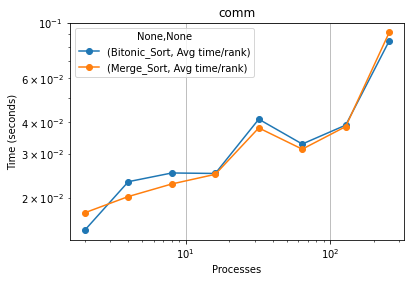

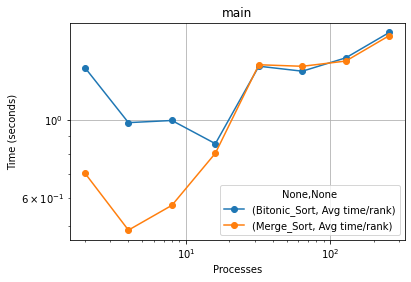

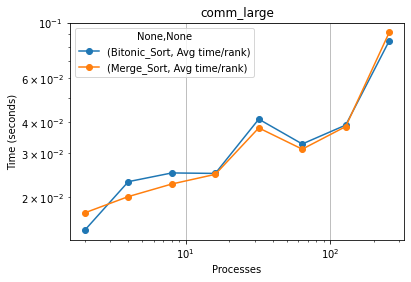

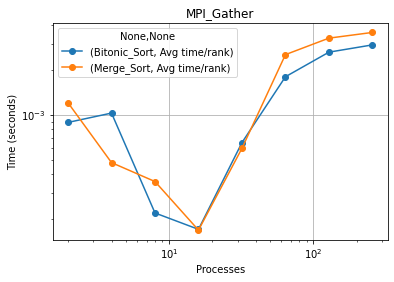

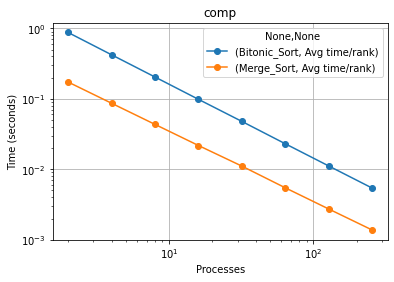

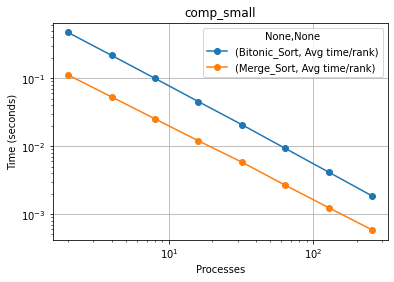

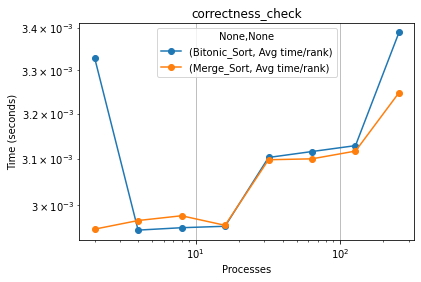

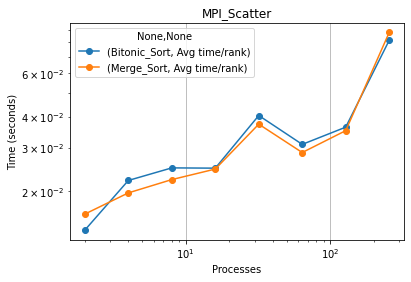

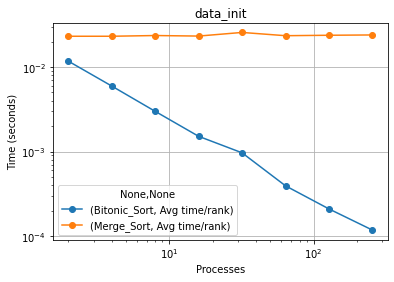

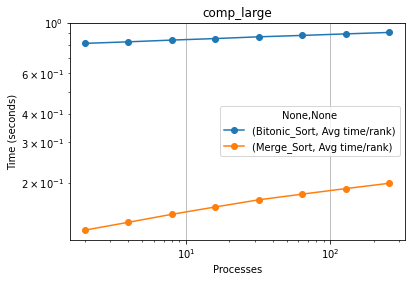

In [18]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

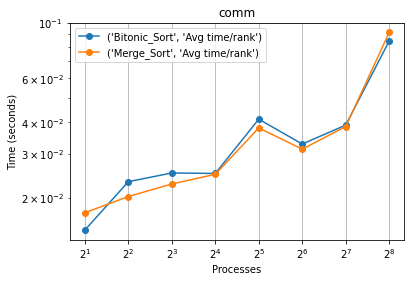

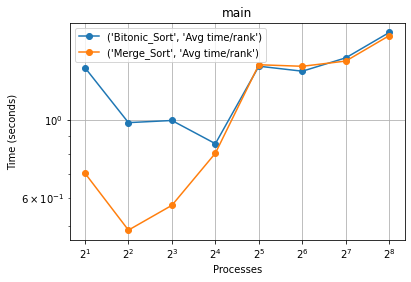

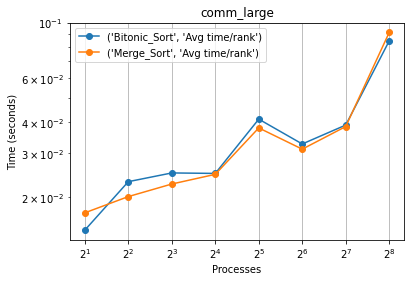

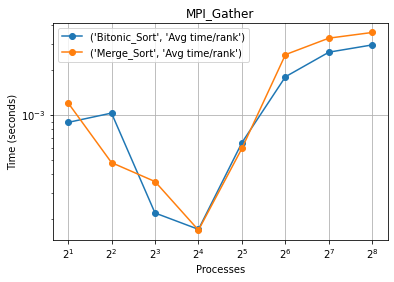

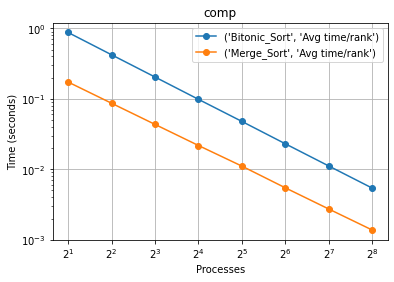

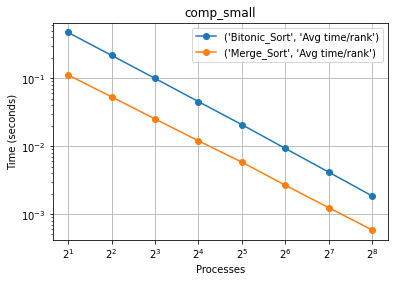

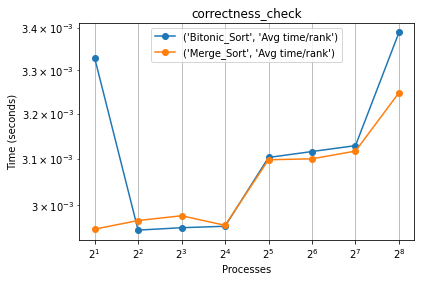

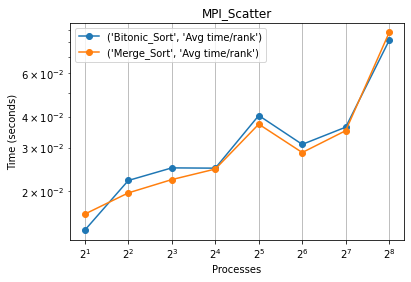

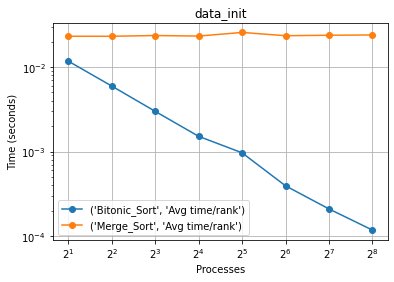

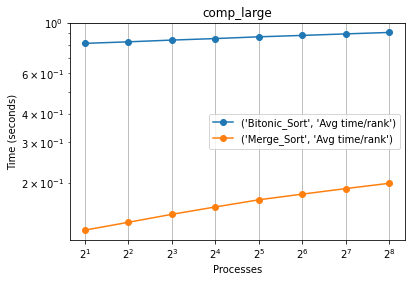

In [17]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
# print(ctk.dataframe.index.levels)

speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-64/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

In [ ]:
 print(ctk.dataframe.index.levels)